# Exploring different types of ReLU func.

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pandas as pd

## Plotting LeakyReLU

In [2]:
def leaky_relu(z, alpha = 0.01):
    return np.maximum(z, alpha * z)

In [3]:
z = np.linspace(-5, 5, 1000)

(-5.0, 5.0, -0.5, 5.0)

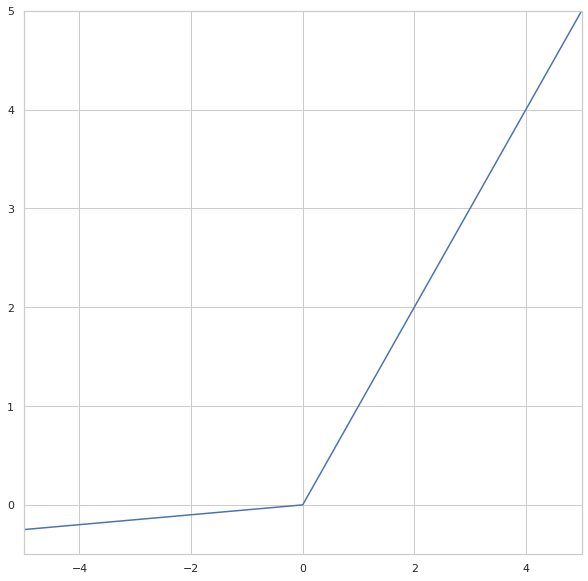

In [4]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,10))
plt.plot(z, leaky_relu(z, alpha = 0.05))
plt.axis([-5, 5, -0.5, 5])

In [5]:
for func in dir(keras.activations):
    if not func.startswith('_'):
        print(func)

deserialize
elu
exponential
get
hard_sigmoid
linear
relu
selu
serialize
sigmoid
softmax
softplus
softsign
swish
tanh


In [6]:
for layer in dir(keras.layers):
    if 'relu' in layer.lower():
        print(layer)

LeakyReLU
PReLU
ReLU
ThresholdedReLU


## Building a LeakyRelu NN and training it on the Fashion MNIST

In [7]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [8]:
x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255

In [9]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, kernel_initializer = 'he_normal'))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Dense(100, kernel_initializer = 'he_normal'))
model.add(keras.layers.LeakyReLU())
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

In [12]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.SGD(lr = 1e-3), metrics = ['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5832 - accuracy: 0.8075 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5349 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5338 - accuracy: 0.8224 - val_loss: 0.5156 - val_accuracy:

In [14]:
df_metrics = pd.DataFrame(history.history)

<AxesSubplot:>

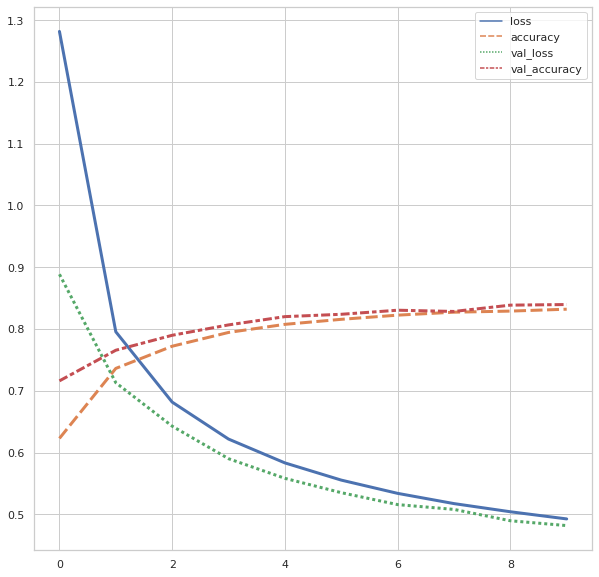

In [15]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df_metrics, linewidth = 3)

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5155 - accuracy: 0.8241


[0.5154930949211121, 0.8241000175476074]

## Building a PRRelu NN model and training it on the Fashion MNIST dataset.

In [21]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, kernel_initializer = 'he_normal'))
model.add(keras.layers.PReLU())
model.add(keras.layers.Dense(100, kernel_initializer = 'he_normal'))
model.add(keras.layers.PReLU())
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
p_re_lu (PReLU)              (None, 300)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 100)               100       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 267,010
Trainable params: 267,010
Non-trainable params: 0
__________________________________________________

In [24]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.SGD(lr = 1e-3), metrics = ['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8197 - accuracy: 0.7356 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6004 - val_accuracy: 0.8048
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5657 - val_accuracy: 0.8178
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5619 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5391 - accuracy: 0.8206 - val_loss: 0.5197 - val_accuracy:

In [26]:
df_metrics = pd.DataFrame(history.history)

<AxesSubplot:>

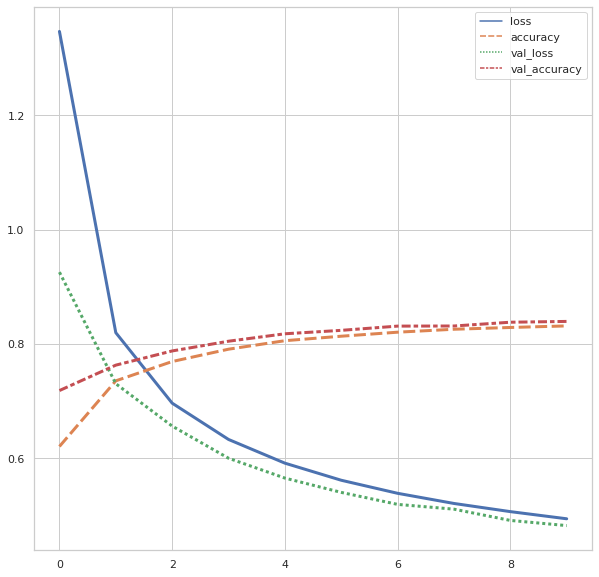

In [28]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df_metrics, linewidth = 3)

## Building a model using Relu and trining it on fashion MNIST dataset

In [43]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

- Standardizing the train, test and validation datsets as we did for SELU activation func.

In [44]:
pixel_mean = x_train.mean(axis = 0, keepdims = True)
pixel_std = x_train.std(axis = 0, keepdims = True)
x_train_scaled = (x_train - pixel_mean) / pixel_std
x_valid_scaled = (x_valid - pixel_mean) / pixel_std
x_test_scaled = (x_test - pixel_mean) / pixel_std

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu', kernel_initializer = 'he_normal'))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [46]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.SGD(lr = 1e-3), metrics = ['accuracy'])

In [47]:
history = model.fit(x_train_scaled, y_train, epochs = 10, validation_data = (x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 17s 10ms/step - loss: 1.8110 - accuracy: 0.2657 - val_loss: 1.3506 - val_accuracy: 0.3986
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 1.1564 - accuracy: 0.5090 - val_loss: 1.0048 - val_accuracy: 0.5586
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.9850 - accuracy: 0.5913 - val_loss: 0.9088 - val_accuracy: 0.6118
Epoch 4/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8806 - accuracy: 0.6536 - val_loss: 0.7989 - val_accuracy: 0.7024
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.8198 - accuracy: 0.6874 - val_loss: 0.8074 - val_accuracy: 0.6956
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.6946 - accuracy: 0.7430 - val_loss: 0.6684 - val_accuracy: 0.7652
Epoch 7/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6724 - accuracy: 0.7546 - val_loss: 0.6385 - val_a

In [48]:
df_metrics = pd.DataFrame(history.history)

<AxesSubplot:>

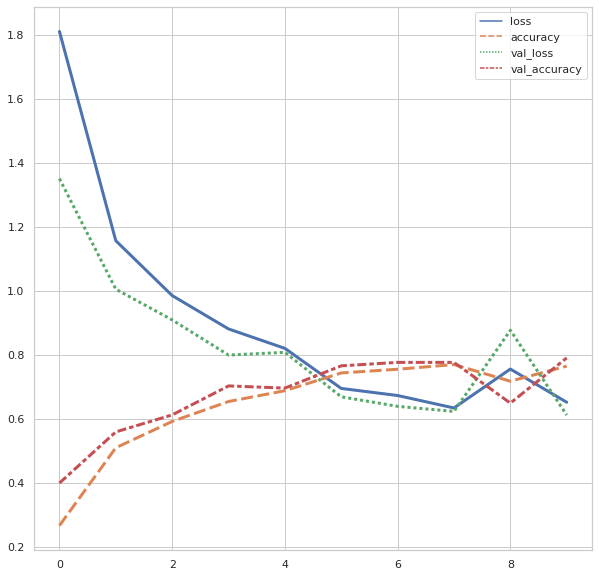

In [49]:
plt.figure(figsize = (10,10))
sns.lineplot(data = df_metrics, linewidth = 3)

- We can see that we are sufferring from the problem of vanishing or exploding gradients towards the end of the training.